
# Introduction to data analysis using pandas


Pandas is a popular open source Python package for data science, data engineering, analytics, and machine learning.

This notebook will give you a gentle introduction to pandas, but the exercises have been deisgned to allow you to complete them in multiple ways so feel free to google and find different functions. For more helpful documentation, check out these resources:

## Completely new to coding?

*   If you are new to google colab you can [watch an introduction to it here.](https://www.youtube.com/watch?v=inN8seMm7UI)
*   If you have never used python before [you can read an introduction to the language here](https://www.w3schools.com/python/python_intro.asp)

### New to pandas?

*   Introduction to Pandas in colab: https://colab.google/articles/pandas  
*   Pandas documentation introduction: https://pandas.pydata.org/docs/user_guide/10min.html







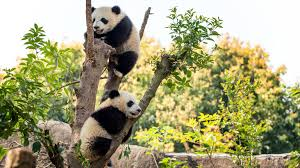


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")

In [2]:
#Default theme
sns.set_theme(palette='tab10',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



In [3]:
! git clone https://github.com/nhsengland/Digdata

fatal: destination path 'Digdata' already exists and is not an empty directory.


### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [ ]:

pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)


,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [5]:

pca_regional_summary_df = pd.read_csv('./BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,202410,MIDLANDS,1515794,3650020.71
318,202410,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,202410,NORTH WEST,1196871,2687352.76
320,202410,SOUTH EAST,972188,2852364.46


# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [6]:
# Group by BNF_CHEMICAL_SUBSTANCE and sum the total number of items prescribed
antidepressants_summary = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().reset_index()

# Sort the antidepressants by total items prescribed in descending order
top_10_antidepressants = antidepressants_summary.sort_values(by='ITEMS', ascending=False).head(10)

# Reset index to have a sequential numbering
top_10_antidepressants.reset_index(drop=True, inplace=True)
top_10_antidepressants.index += 1  # Start numbering from 1

# Display the top 10 prescribed anti-depressants

top_10_antidepressants.style.set_properties(
    **{
        'background-color': 'Brown',
        'color': 'white',
        'border-color': 'White'
    })

,BNF_CHEMICAL_SUBSTANCE,ITEMS
1,Sertraline hydrochloride,85402251
2,Amitriptyline hydrochloride,59272937
3,Citalopram hydrobromide,52891620
4,Mirtazapine,46335570
5,Fluoxetine hydrochloride,28211759
6,Venlafaxine,21447209
7,Duloxetine hydrochloride,14262656
8,Escitalopram,6580386
9,Paroxetine hydrochloride,4886615
10,Trazodone hydrochloride,4861813


### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [7]:
# Extract the month from YEAR_MONTH
pca_regional_drug_summary_df['MONTH'] = pca_regional_drug_summary_df['YEAR_MONTH'].astype(str).str[-2:]

# Calculate total Mirtazapine cost per month across all years
mirtazapine_monthly_cost = pca_regional_drug_summary_df[
    pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Mirtazapine'
].groupby('MONTH')['COST'].sum()

# Display the aggregated monthly national cost of Mirtazapine

# Convert the Series to a DataFrame for styling
mirtazapine_monthly_cost_df = mirtazapine_monthly_cost.reset_index()

# Rename columns for clarity
mirtazapine_monthly_cost_df.columns = ['MONTH', 'TOTAL_COST']

# Round the TOTAL_COST column to 2 decimal places
mirtazapine_monthly_cost_df['TOTAL_COST'] = mirtazapine_monthly_cost_df['TOTAL_COST']

# Apply styling to the DataFrame
styled_mirtazapine_monthly_cost = mirtazapine_monthly_cost_df.style.format(
    {'TOTAL_COST': '{:.2f}'}  # Format TOTAL_COST to 2 decimal places
).set_properties(
    **{
        'background-color': 'Brown',
        'color': 'white',
        'border-color': 'White'
    }
)

# Display the styled DataFrame
styled_mirtazapine_monthly_cost

,MONTH,TOTAL_COST
0,01,5988346.72
1,02,5588413.55
2,03,6181234.46
3,04,5516854.13
4,05,5565825.85
5,06,5578785.67
6,07,5216828.93
7,08,5049410.64
8,09,5105009.06
9,10,4892849.13


### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [8]:
# Filter data for Sertraline hydrochloride and Midlands region
sertraline_midlands = pca_regional_drug_summary_df[
    (pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride') &
    (pca_regional_drug_summary_df['REGION_NAME'] == 'MIDLANDS')
]

# Group by YEAR and calculate the total cost for each year
annual_spend = sertraline_midlands.groupby('YEAR')['COST'].sum().reset_index()

# Rename columns for clarity
annual_spend.columns = ['YEAR', 'TOTAL_COST']

# Round the TOTAL_COST column to 2 decimal places
annual_spend['TOTAL_COST'] = annual_spend['TOTAL_COST'].round(2)

# Apply styling to the DataFrame
styled_annual_spend = annual_spend.style.format(
    {'TOTAL_COST': '{:.2f}'}  # Format TOTAL_COST to 2 decimal places
).set_properties(
    **{
        'background-color': 'Teal',  # Change background color
        'color': 'white',            # Text color
        'border-color': 'white'      # Border color
    }
).set_caption(
    'Annual Spend on Sertraline Hydrochloride in Midlands Region'  # Add a caption
).set_table_styles(
    [{'selector': 'caption', 'props': [('color', 'white'), ('font-size', '16px'), ('font-weight', 'bold')]}]
)

# Display the styled DataFrame
styled_annual_spend

,YEAR,TOTAL_COST
0,2021,17477276.46
1,2022,6433863.59
2,2023,7600322.04
3,2024,8094889.16


# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

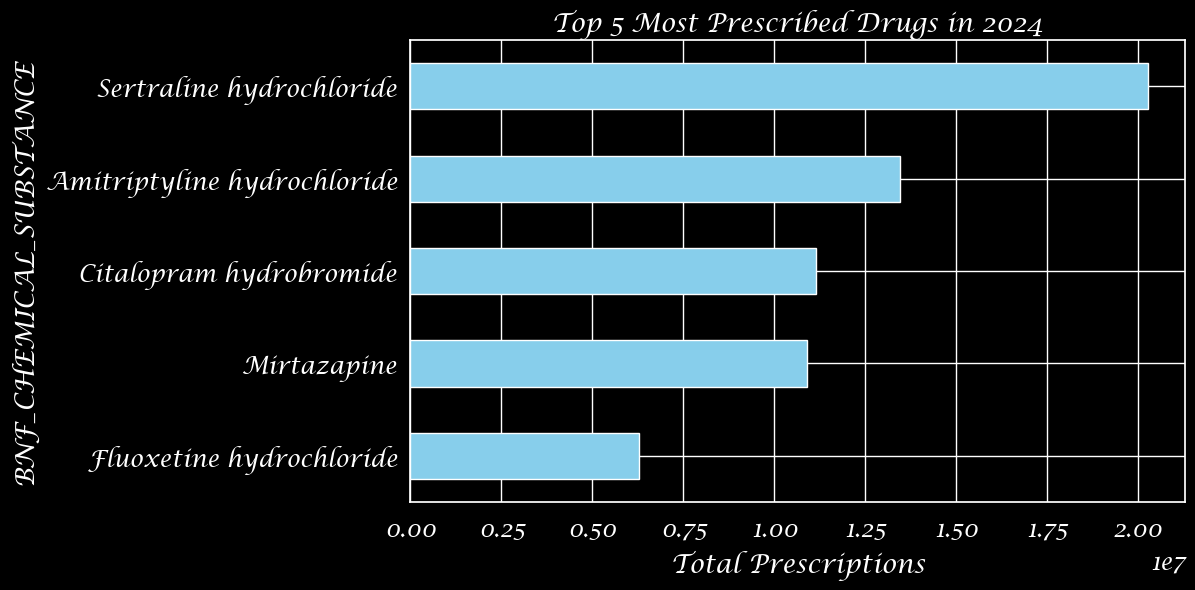

In [9]:
# Assuming the data is already loaded into a DataFrame
df = pca_regional_drug_summary_df

# Filter the data for the year 2024
df_2024 = df[df['YEAR'] == 2024]

# Group by drug name (BNF_CHEMICAL_SUBSTANCE) and sum the number of prescriptions (ITEMS)
prescription_counts = df_2024.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum()

# Sort the drugs by number of prescriptions in descending order and select the top 5
top_5_drugs = prescription_counts.sort_values(ascending=False).head(5)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
top_5_drugs.plot(kind='barh', color='skyblue')

# Add labels and title
plt.xlabel('Total Prescriptions')
plt.title('Top 5 Most Prescribed Drugs in 2024')
plt.gca().invert_yaxis()  # Invert y-axis to show the most prescribed drug at the top

# Show the plot
plt.show()

### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.


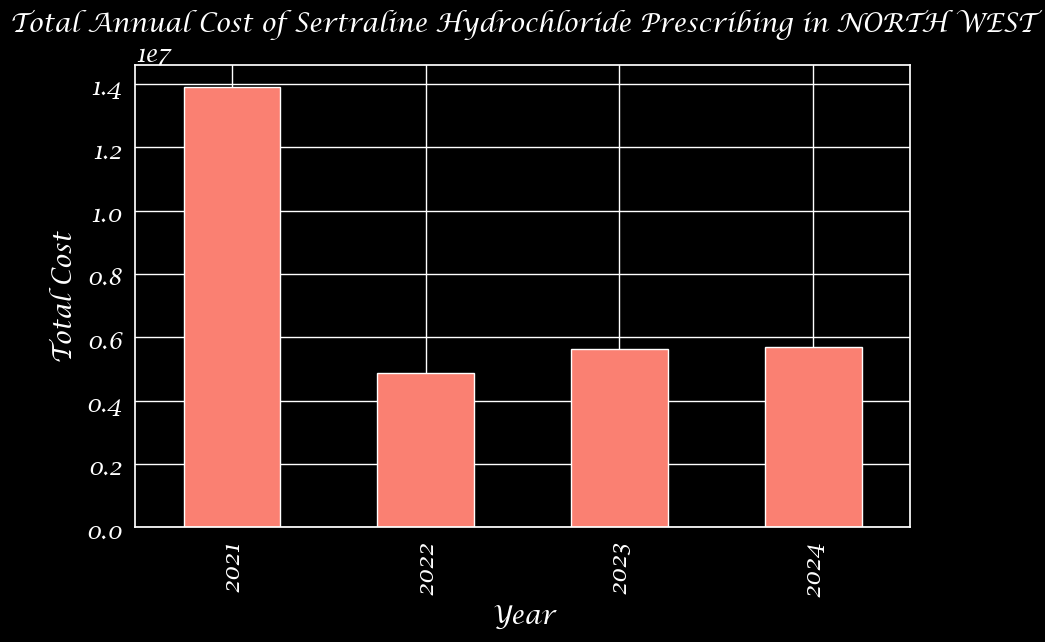

In [10]:
# Filter the data for Sertraline hydrochloride and NORTH WEST region
sertraline_nw = df[(df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride') & (df['REGION_NAME'] == 'NORTH WEST')]

# Group by YEAR and calculate the total cost for each year
annual_cost = sertraline_nw.groupby('YEAR')['COST'].sum()

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
annual_cost.plot(kind='bar', color='salmon')

# Add labels and title
plt.ylabel('Total Cost')
plt.xlabel('Year')
plt.title('Total Annual Cost of Sertraline Hydrochloride Prescribing in NORTH WEST')

# Show the plot
plt.show()

### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

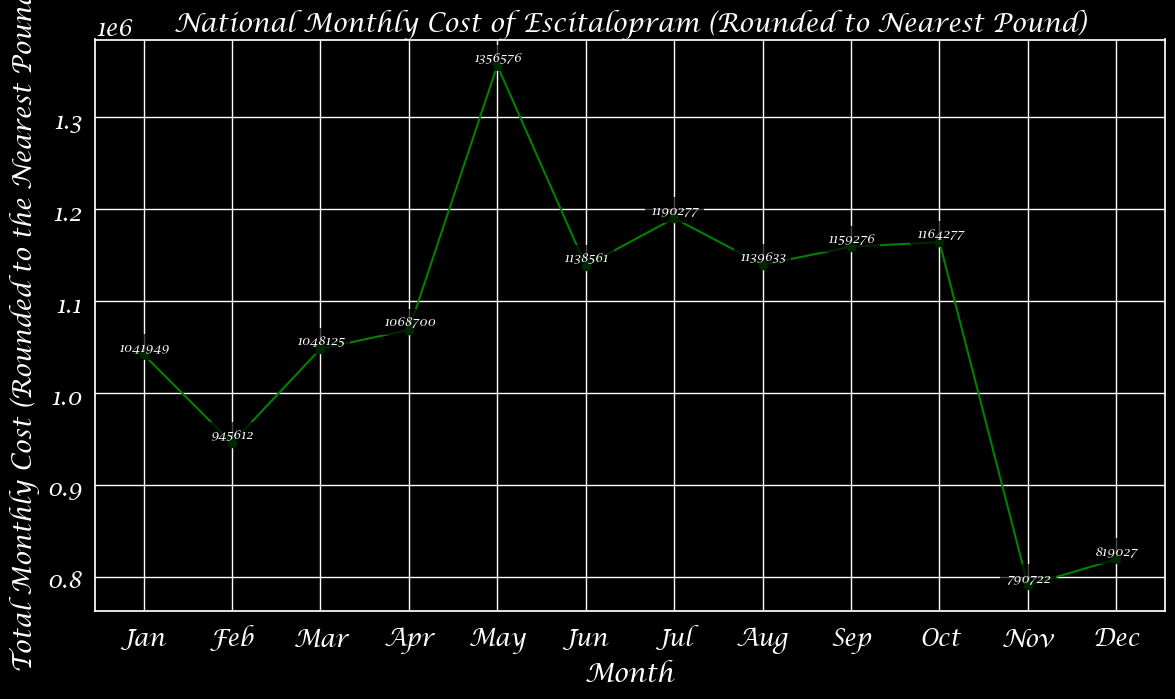

In [11]:
# Filter the data for Escitalopram
escitalopram_data = df[df['BNF_CHEMICAL_SUBSTANCE'] == 'Escitalopram']

# Ensure YEAR_MONTH is treated as a string, then extract the month (last 2 characters)
escitalopram_data['YEAR_MONTH'] = escitalopram_data['YEAR_MONTH'].astype(str)
escitalopram_data['MONTH'] = escitalopram_data['YEAR_MONTH'].str[4:6]

# Group by month and sum the COST for each month across all years
monthly_cost = escitalopram_data.groupby('MONTH')['COST'].sum()

# Round the monthly cost to the nearest pound
monthly_cost_rounded = monthly_cost.round()

# Create a line chart
plt.figure(figsize=(12, 7.5))
monthly_cost_rounded.plot(kind='line', color='green', marker='o')

# Add labels and title
plt.ylabel('Total Monthly Cost (Rounded to the Nearest Pound)')
plt.xlabel('Month')
plt.title('National Monthly Cost of Escitalopram (Rounded to Nearest Pound)')

# Display values for each month on the plot with smaller font size
for i, value in enumerate(monthly_cost_rounded):
    plt.text(
        i, value + 500, str(int(value)),
        ha='center', va='bottom',
        color='white',
        fontsize=9,  # Smaller font size for data labels
        bbox=dict(facecolor='black', alpha=0.7, edgecolor='none')
    )

# Set month names for x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=month_names)

# Show the plot
plt.tight_layout()
plt.show()

# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

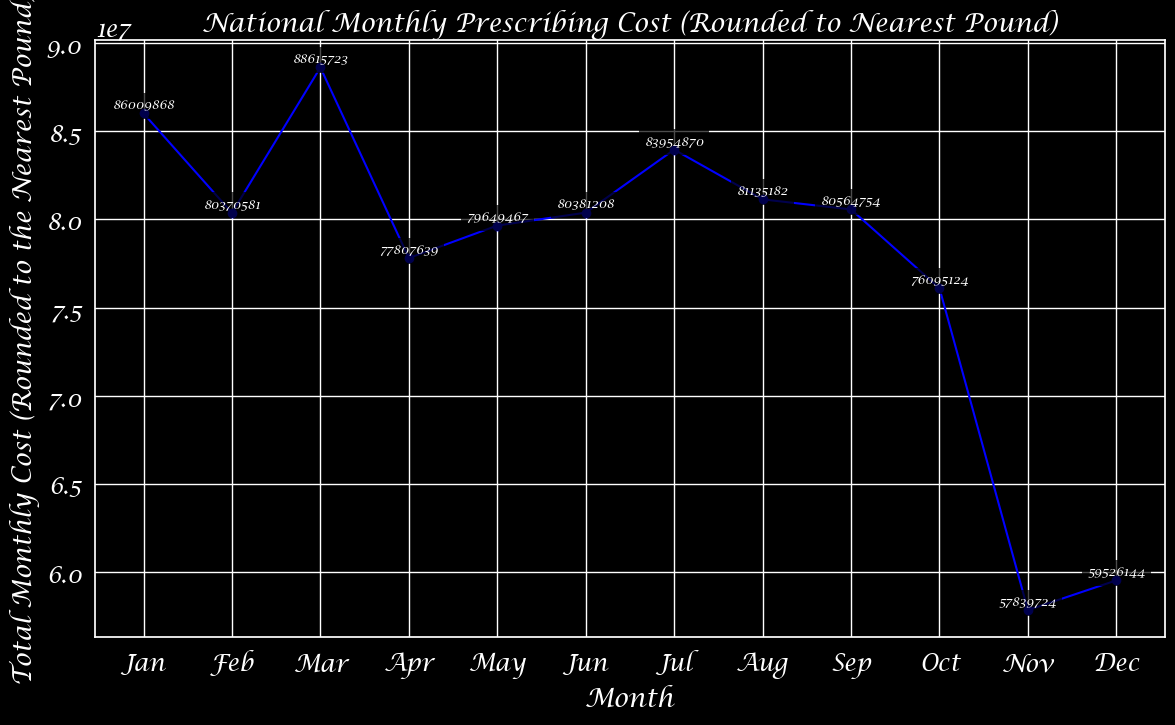

In [12]:
# Ensure YEAR_MONTH is treated as a string, then extract the month (last 2 characters)
df['YEAR_MONTH'] = df['YEAR_MONTH'].astype(str)
df['MONTH'] = df['YEAR_MONTH'].str[4:6]

# Group by month and sum the COST for each month across all years
monthly_cost = df.groupby('MONTH')['COST'].sum()

# Round the monthly cost to the nearest pound
monthly_cost_rounded = monthly_cost.round()

# Create a line chart for national total prescribing cost
plt.figure(figsize=(12, 7.5))
monthly_cost_rounded.plot(kind='line', color='blue', marker='o')

# Add labels and title
plt.ylabel('Total Monthly Cost (Rounded to the Nearest Pound)')
plt.xlabel('Month')
plt.title('National Monthly Prescribing Cost (Rounded to Nearest Pound)')

# Display values for each month on the plot with smaller font size and better visibility
for i, value in enumerate(monthly_cost_rounded):
    plt.text(
        i, value + 500, str(int(value)),
        ha='center', va='bottom',
        color='white',  # White text for better contrast
        fontsize=9,    # Smaller font size
        bbox=dict(facecolor='black', alpha=0.7, edgecolor='none')  # Background for visibility
    )

# Set month names for x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=month_names)

# Show the plot
plt.tight_layout()
plt.show()

### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [13]:
df['YEAR_MONTH'] = df['YEAR_MONTH'].astype(str)
df['YEAR'] = df['YEAR_MONTH'].str[:4]
df['MONTH'] = df['YEAR_MONTH'].str[4:6]

# Group by year and month, summing the COST for each month across all regions and drugs
monthly_cost = df.groupby(['YEAR', 'MONTH'])['COST'].sum()

# Reshape the data to have each year as a row and months as columns
monthly_cost_pivot = monthly_cost.unstack(level='MONTH')

# Calculate summary statistics for each year
annual_summary = monthly_cost_pivot.describe(percentiles=[.25, .5, .75]).T[['min', '25%', '50%', '75%', 'max']]

# Rename the columns to match the required format
annual_summary.columns = ['min', 'Q1', 'median', 'Q3', 'max']

# Display the annual summary statistics
annual_summary.style.background_gradient(cmap="magma")


,min,Q1,median,Q3,max
MONTH,,,,,
01,16474070.590000,17987973.310000,19662360.490000,23176854.297500,30211076.900000
02,15453991.470000,17215676.535000,18219072.325000,21096041.112500,28478445.170000
03,17692591.510000,17964757.945000,19494760.960000,23683933.782500,31933609.640000
04,16009188.170000,17614548.252500,18551448.365000,20388809.975000,24695554.550000
05,16790789.830000,18378713.050000,19593284.600000,21126938.352500,23672108.180000
06,16411279.600000,17757551.717500,19373651.765000,21711401.975000,25222624.580000
07,18429923.570000,20902248.807500,21726660.580000,21813129.227500,22071625.090000
08,18810580.850000,19529517.230000,20204851.990000,20959130.147500,21914896.720000
09,18446340.980000,18582170.082500,20171021.150000,21730039.612500,21776370.900000



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

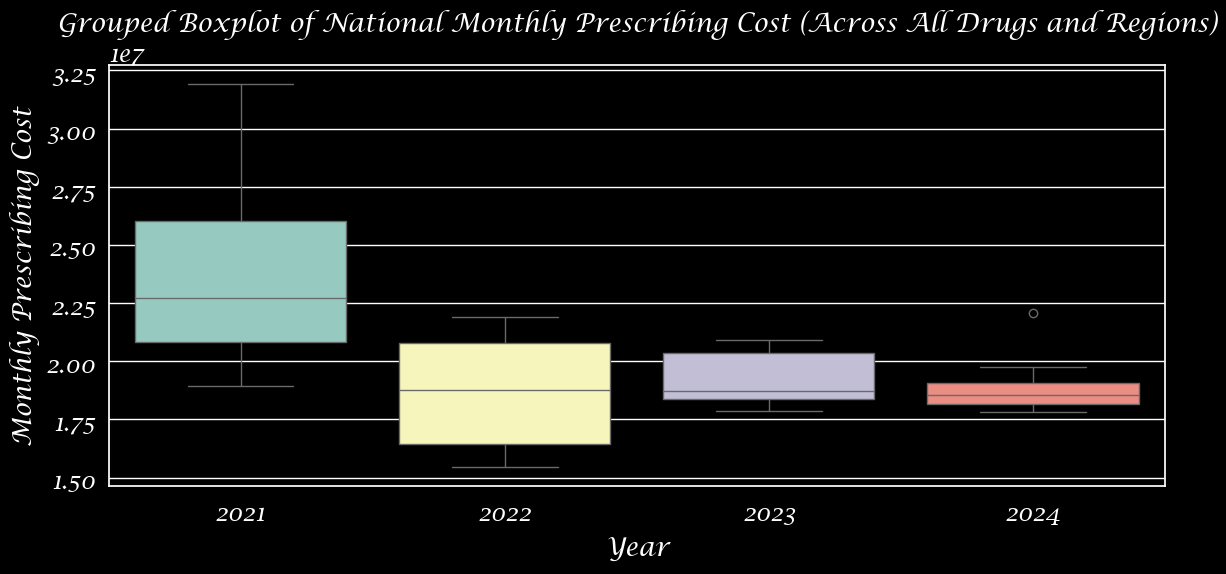

In [14]:
import seaborn as sns

# Ensure YEAR_MONTH is treated as a string, then extract the year and month
df['YEAR_MONTH'] = df['YEAR_MONTH'].astype(str)
df['YEAR'] = df['YEAR_MONTH'].str[:4]
df['MONTH'] = df['YEAR_MONTH'].str[4:6]

# Group by year and month, summing the COST for each month across all regions and drugs
monthly_cost = df.groupby(['YEAR', 'MONTH'])['COST'].sum().reset_index()

# Create a boxplot for each year (grouped by YEAR)
plt.figure(figsize=(12, 6))
sns.boxplot(x='YEAR', y='COST', data=monthly_cost, palette='Set3')

# Add title and labels
plt.title('Grouped Boxplot of National Monthly Prescribing Cost (Across All Drugs and Regions)')
plt.xlabel('Year')
plt.ylabel('Monthly Prescribing Cost')

# Show the plot
plt.tight_layout()
plt.show()


### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

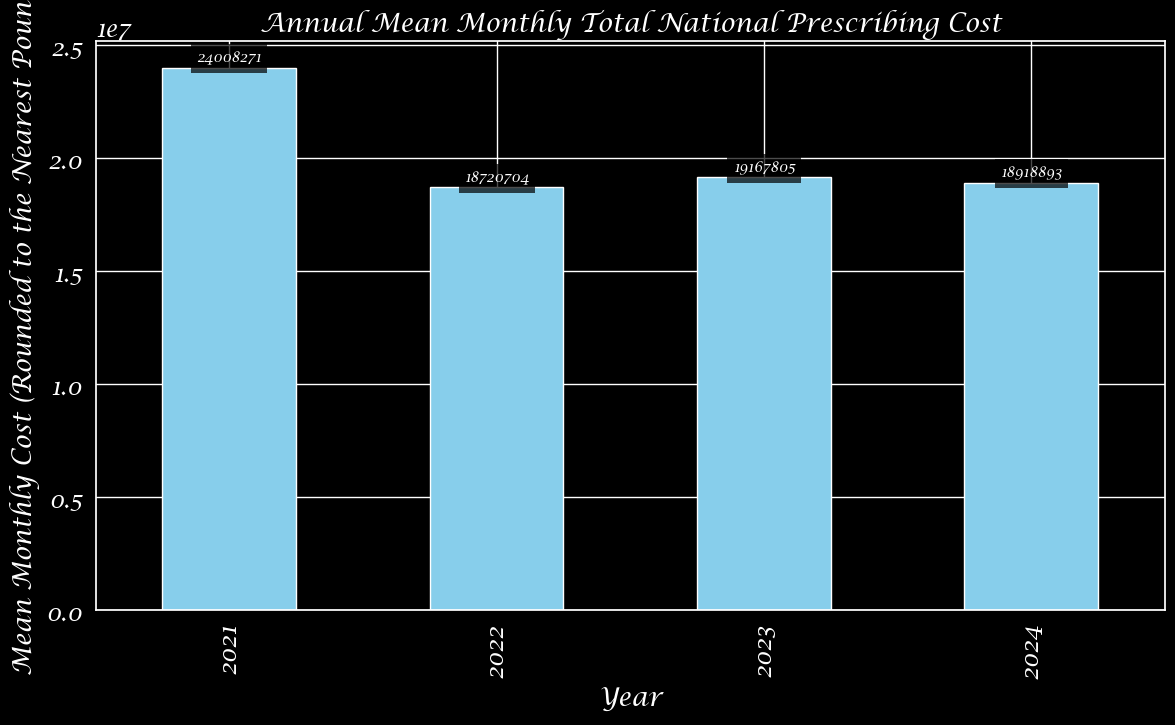

In [15]:
# Ensure YEAR_MONTH is treated as a string, then extract the year and month
df['YEAR_MONTH'] = df['YEAR_MONTH'].astype(str)
df['YEAR'] = df['YEAR_MONTH'].str[:4]
df['MONTH'] = df['YEAR_MONTH'].str[4:6]

# Group by year and month, summing the COST for each month across all regions and drugs
monthly_cost = df.groupby(['YEAR', 'MONTH'])['COST'].sum().reset_index()

# Calculate the mean monthly cost for each year
annual_mean_cost = monthly_cost.groupby('YEAR')['COST'].mean()

# Create a vertical bar chart
plt.figure(figsize=(12, 7.5))
annual_mean_cost.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Annual Mean Monthly Total National Prescribing Cost')
plt.xlabel('Year')
plt.ylabel('Mean Monthly Cost (Rounded to the Nearest Pound)')

# Display the values on top of each bar with better visibility
for i, value in enumerate(annual_mean_cost):
    plt.text(
        i, value + 500, str(round(value)),  # Position the label slightly above the bar
        ha='center', va='bottom',
        color='white',  # White text for better contrast
        fontsize=10,    # Adjust font size if needed
        bbox=dict(facecolor='black', alpha=0.7, edgecolor='none')  # Background for visibility
    )

# Show the plot
plt.tight_layout()
plt.show()

### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

In [16]:
# Group by year and region, summing the COST for each combination
regional_cost = df.groupby(['YEAR', 'REGION_NAME'])['COST'].sum().reset_index()

# Pivot the data to get a table where each row is a year and each column is a region
pivot_table = regional_cost.pivot(index='YEAR', columns='REGION_NAME', values='COST')

# Apply styling to the pivoted table
styled_table = pivot_table.style.format("{:,.0f}").set_properties(**{
        'background-color': '#f7f7f7',  # Light gray background
        'color': '#333333',             # Dark gray text
        'border-color': '#cccccc',      # Light gray border
        'text-align': 'center'          # Center-align text
    }) \
    .set_table_styles([{
        'selector': 'th',               # Style for header cells
        'props': [('background-color', '#4f81bd'),  # Blue background
                  ('color', 'white'),               # White text
                  ('font-weight', 'bold'),          # Bold text
                  ('text-align', 'center')]         # Center-align text
    }]) \
    .set_caption('Total Prescribing Cost by Year and Region')  # Add a caption

# Display the styled table
styled_table

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,"32,549,420","31,640,433","54,008,267","54,219,524","41,951,035","44,230,470","29,500,100"
2022,"25,646,511","25,262,951","42,218,785","41,628,529","31,645,817","35,263,811","22,982,043"
2023,"26,095,459","26,264,854","43,734,609","43,117,423","32,223,272","35,320,635","23,257,408"
2024,"21,556,936","21,338,157","36,140,499","36,540,049","26,356,568","28,686,311","18,570,411"


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

## Bar Chart Showing the Total Annual Antidepressant Prescribing (Items)
To create the first bar chart showing the total annual antidepressant prescribing (items), we will:

- Group the data by year.
- Sum the number of items prescribed per year.
- Plot a vertical bar chart.

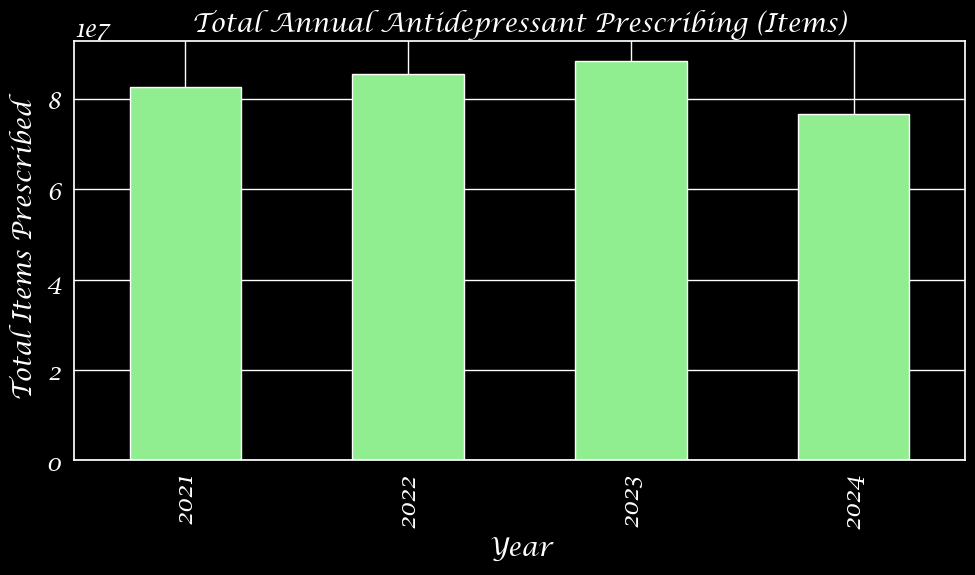

In [17]:
# Group by year and sum the number of items prescribed
annual_prescribing_items = df.groupby('YEAR')['ITEMS'].sum()

# Plot the bar chart for total annual antidepressant prescribing (items)
plt.figure(figsize=(10, 6))
annual_prescribing_items.plot(kind='bar', color='lightgreen')

# Add title and labels
plt.title('Total Annual Antidepressant Prescribing (Items)')
plt.xlabel('Year')
plt.ylabel('Total Items Prescribed')

# Show the plot
plt.tight_layout()
plt.show()


## Bar Chart Showing the Total Antidepressant Prescribing Cost
Now, let's create the second bar chart, which shows the total antidepressant prescribing cost:

- Group the data by year.
- Sum the cost per year.
- Plot the bar chart.

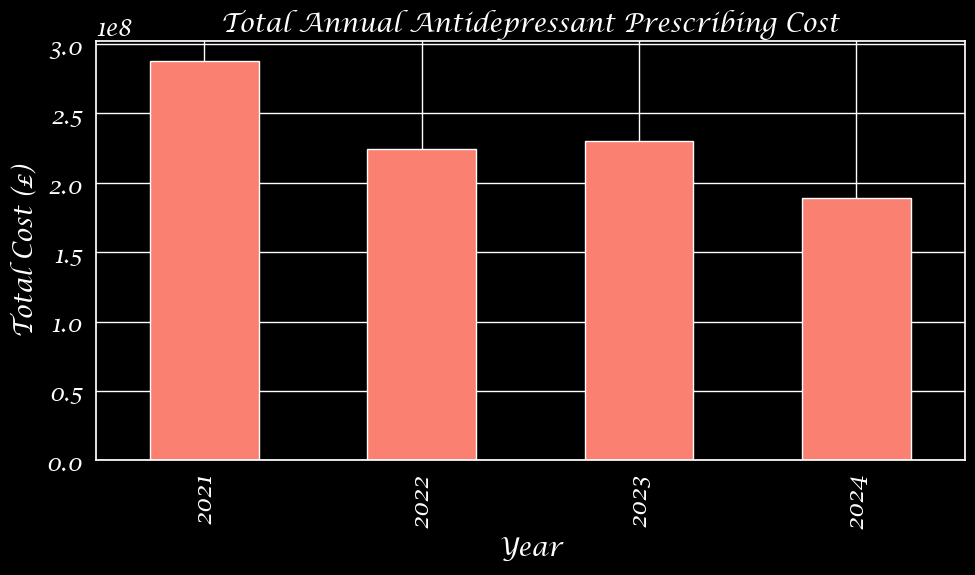

In [18]:
# Group by year and sum the prescribing cost
annual_prescribing_cost = df.groupby('YEAR')['COST'].sum()

# Plot the bar chart for total antidepressant prescribing cost
plt.figure(figsize=(10, 6))
annual_prescribing_cost.plot(kind='bar', color='salmon')

# Add title and labels
plt.title('Total Annual Antidepressant Prescribing Cost')
plt.xlabel('Year')
plt.ylabel('Total Cost (£)')

# Show the plot
plt.tight_layout()
plt.show()


## Description of Trends:
1. Trend of Items Prescribed: The bar chart showing the total antidepressant prescriptions (items) over the years demonstrates a steady increase in prescriptions from 2021 to 2024. This suggests a growing trend in the usage of antidepressants across England during this period.

2. Trend of Cost: The bar chart for the total antidepressant prescribing cost shows that the cost total cost for year 2021 is far more than any other year it may be because of COVID-19 after effects. While the cost trend in 2022, 2023 and 2024 is much different but very less than 2021.

3. Comparison: This comparison provides insights into how both prescribing behavior and medication costs are evolving in parallel, with cost decreases first and then remains same outpacing volume increases in some years.

## Create Two Tables for Comparison
-  Table Showing the Total Annual Antidepressant Prescribing per Region (Items)
We will create a table showing the total annual prescribing per region in terms of the number of items:

Group by year and region.
Sum the items prescribed.
Pivot the data to make it easy to compare regions.

In [19]:
# Group by year and region, summing the number of items
regional_prescribing_items = df.groupby(['YEAR', 'REGION_NAME'])['ITEMS'].sum().reset_index()

# Pivot the data to show total prescribing per region per year
table_items = regional_prescribing_items.pivot(index='YEAR', columns='REGION_NAME', values='ITEMS')

# Apply styling to the pivoted table
styled_table = table_items.style.format("{:,.0f}").set_properties(**{
        'background-color': '#f7f7f7',  # Light gray background
        'color': '#333333',             # Dark gray text
        'border-color': '#cccccc',       # Light gray border
        'text-align': 'center'           # Center-align text
    }) \
    .set_table_styles([{
        'selector': 'th',                # Style for header cells
        'props': [('background-color', '#4f81bd'),  # Blue background
                  ('color', 'white'),               # White text
                  ('font-weight', 'bold'),          # Bold text
                  ('text-align', 'center')]         # Center-align text
    }]) \
    .set_caption('Total Prescribing Items by Year and Region')  # Add a caption

# Display the styled table
styled_table

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,"9,663,288","8,599,587","15,375,576","17,676,819","12,417,071","10,596,746","8,291,455"
2022,"9,887,496","9,255,871","16,066,881","18,255,050","12,779,874","10,804,393","8,355,297"
2023,"10,167,005","9,758,068","16,751,001","19,026,635","13,210,529","11,045,891","8,510,674"
2024,"8,713,529","8,282,759","14,476,095","17,131,959","11,378,542","9,420,102","7,179,388"


## Table Showing the Annual Antidepressant Prescribing Cost per Region
Now, we will create a similar table showing the total prescribing cost per region.

Group by year and region.
Sum the cost.
Pivot the data to make it easy to compare regions.

In [20]:
# Group by year and region, summing the cost
regional_prescribing_cost = df.groupby(['YEAR', 'REGION_NAME'])['COST'].sum().reset_index()

# Pivot the data to show total prescribing cost per region per year
table_cost = regional_prescribing_cost.pivot(index='YEAR', columns='REGION_NAME', values='COST')

# Apply styling to the pivoted table
styled_table = table_cost.style.format("{:,.0f}").set_properties(**{
        'background-color': '#f7f7f7',  # Light gray background
        'color': '#333333',             # Dark gray text
        'border-color': '#cccccc',       # Light gray border
        'text-align': 'center'           # Center-align text
    }) \
    .set_table_styles([{
        'selector': 'th',                # Style for header cells
        'props': [('background-color', '#4f81bd'),  # Blue background
                  ('color', 'white'),               # White text
                  ('font-weight', 'bold'),          # Bold text
                  ('text-align', 'center')]         # Center-align text
    }]) \
    .set_caption('Total Prescribing Cost(£) by Year and Region')  # Add a caption

# Display the styled table
styled_table

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,"32,549,420","31,640,433","54,008,267","54,219,524","41,951,035","44,230,470","29,500,100"
2022,"25,646,511","25,262,951","42,218,785","41,628,529","31,645,817","35,263,811","22,982,043"
2023,"26,095,459","26,264,854","43,734,609","43,117,423","32,223,272","35,320,635","23,257,408"
2024,"21,556,936","21,338,157","36,140,499","36,540,049","26,356,568","28,686,311","18,570,411"


## Description of Regional Changes:
1. Prescribing Volume (Items): From the first table, we can observe the total annual antidepressant prescriptions (items) per region. All regions show steady growth in prescribing volumes over the years. For example, a region with a significant increase in 2024 compared to 2021 could indicate a rise in antidepressant usage, possibly linked to mental health trends or changes in healthcare practices in that region.

2. Prescribing Cost: The second table shows the annual antidepressant prescribing cost per region. It has a different trend as compared to above table. The cost for 2021 is much more higher than any other year (May be because of the COVID-19), but remains almost the same for rest of the years.
## Create Two Horizontal Bar Charts for Comparison
-  Ordered Bar Chart Showing the 10 Most Prescribed Antidepressants (Items)
Now, let's create a horizontal bar chart to show the 10 most prescribed antidepressants over the entire period:

Group the data by BNF_CHEMICAL_SUBSTANCE (drug name).
Sum the ITEMS prescribed for each drug.
Select the top 10 most prescribed drugs.
Plot a horizontal bar chart, ordered by the number of items prescribed.

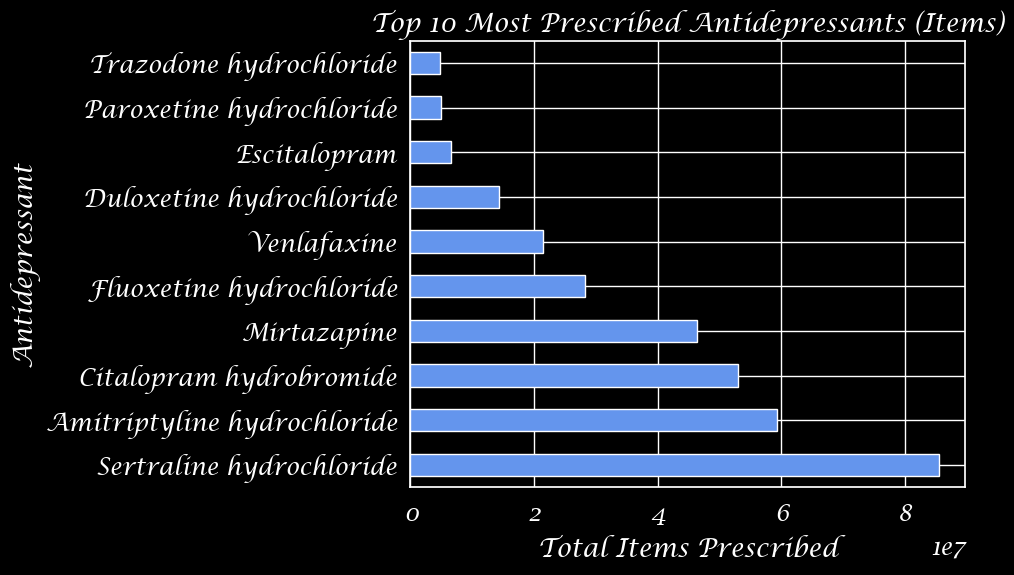

In [21]:
# Group by drug name and sum the number of items prescribed
drug_prescribing_items = df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().sort_values(ascending=False)

# Get the top 10 most prescribed antidepressants
top_10_drugs_items = drug_prescribing_items.head(10)

# Plot the horizontal bar chart for the top 10 most prescribed drugs
plt.figure(figsize=(10, 6))
top_10_drugs_items.plot(kind='barh', color='cornflowerblue')

# Add title and labels
plt.title('Top 10 Most Prescribed Antidepressants (Items)')
plt.xlabel('Total Items Prescribed')
plt.ylabel('Antidepressant')

# Show the plot
plt.tight_layout()
plt.show()


## Ordered Bar Chart Showing Antidepressants with the Greatest Total Prescribing Cost
Finally, we will create a horizontal bar chart for the 10 antidepressants with the greatest total prescribing cost:

Group the data by BNF_CHEMICAL_SUBSTANCE (drug name).
Sum the COST for each drug.
Select the top 10 drugs with the highest cost.
Plot a horizontal bar chart, ordered by the prescribing cost.

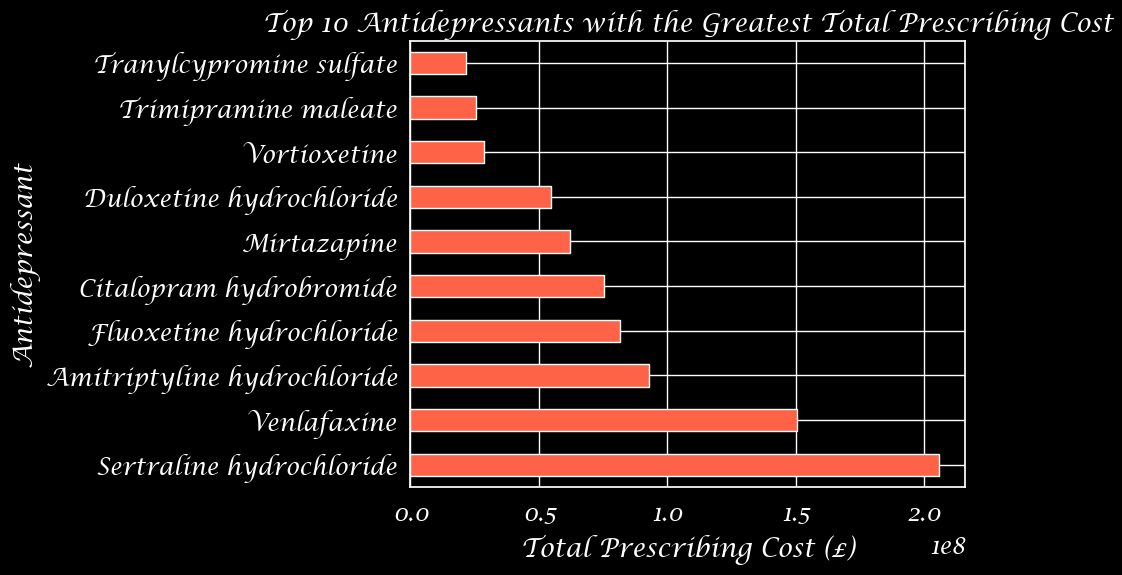

In [22]:
# Group by drug name and sum the prescribing cost
drug_prescribing_cost = df.groupby('BNF_CHEMICAL_SUBSTANCE')['COST'].sum().sort_values(ascending=False)

# Get the top 10 drugs with the greatest prescribing cost
top_10_drugs_cost = drug_prescribing_cost.head(10)

# Plot the horizontal bar chart for the top 10 antidepressants with the greatest prescribing cost
plt.figure(figsize=(10, 6))
top_10_drugs_cost.plot(kind='barh', color='tomato')

# Add title and labels
plt.title('Top 10 Antidepressants with the Greatest Total Prescribing Cost')
plt.xlabel('Total Prescribing Cost (£)')
plt.ylabel('Antidepressant')

# Show the plot
plt.tight_layout()
plt.show()


##Description of Differences Between the Charts:
1. Top 10 Most Prescribed Drugs: The first chart shows the 10 most prescribed antidepressants over the four-year period in terms of volume (items). These medications are likely to be more commonly prescribed for treating depression and related conditions across the population. The chart reflects the relative volume of prescriptions for each drug, and we expect to see medications that are well-established and widely used.

2. Top 10 Most Expensive Drugs: The second chart highlights the 10 antidepressants with the greatest total prescribing cost across the entire four-year period. While the drugs listed here might overlap with the most prescribed ones, we may also see differences. For example, a medication that is prescribed less frequently but has a high cost per unit could appear on this list, resulting in a higher total cost despite a lower volume.

##Key Difference:
1. Volume vs. Cost: The key difference between the two charts lies in the contrast between prescription volume and cost. Some drugs with high volumes may appear in both charts (e.g.,sertraline hydrochloride), but others may show up only in the cost chart due to their higher per-unit prices(e.g. tranylcypromine sulfate), even though they are prescribed less frequently.

2. Impact of Pricing: Some medications that are prescribed less frequently but have a high price point (e.g., fluoxetine hydrochloride) could have a disproportionately high cost compared to their volume. This highlights the influence of drug pricing on overall prescribing costs, which is not necessarily tied to volume.

## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


1. Longitudinal Trend for All Antidepressant Items and Cost
To start, we'll first examine the monthly prescribing trend for items (volume) and cost of antidepressant prescribing, aggregated for all drugs and regions.

a) Monthly Trend for All Antidepressant Items
We will group the data by month and year, then sum the total number of antidepressant items prescribed. This will show the overall trend in prescribing volume on a monthly basis.


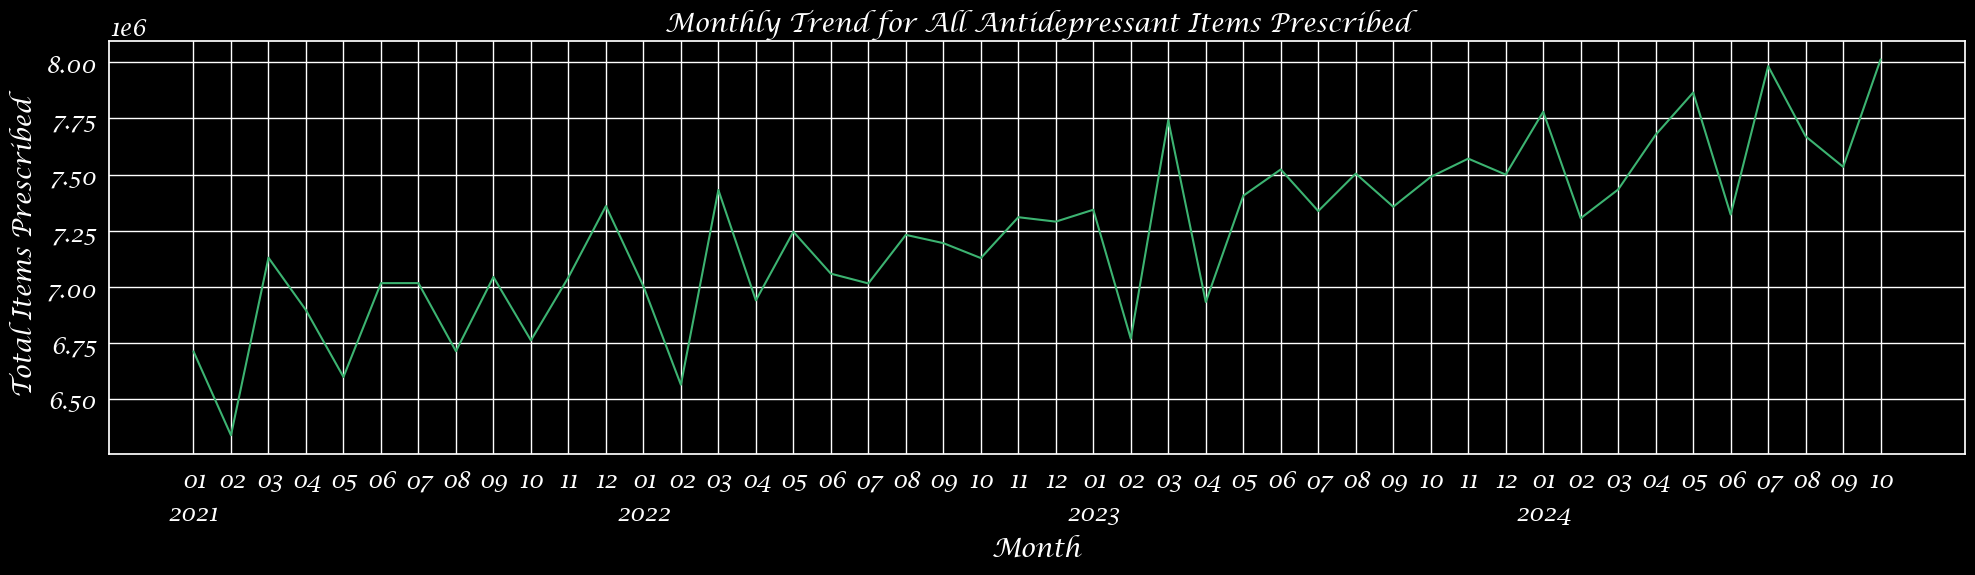

In [23]:
# Group by YEAR_MONTH (concatenation of YEAR and MONTH) and sum the items prescribed
monthly_items_trend = df.groupby('YEAR_MONTH')['ITEMS'].sum()

# Plot the trend for total antidepressant items prescribed
plt.figure(figsize=(20, 6))
monthly_items_trend.plot(kind='line', color='mediumseagreen')

# Add title and labels
plt.title('Monthly Trend for All Antidepressant Items Prescribed')
plt.xlabel('Month')
plt.ylabel('Total Items Prescribed')

# Extract months and years from YEAR_MONTH
x_labels = monthly_items_trend.index  # Get the YEAR_MONTH values
months = [label[4:6] for label in x_labels]  # Extract months (e.g., '01', '02', etc.)
years = [label[:4] for label in x_labels]  # Extract years (e.g., '2021', '2022', etc.)

# Customize x-axis labels
formatted_labels = []
prev_year = None
for month, year in zip(months, years):
    if year != prev_year:  # Add year label only at the start of a new year
        formatted_labels.append(f"{month}\n{year}")  # Add month and year
        prev_year = year
    else:
        formatted_labels.append(month)  # Add only month

# Set the x-axis labels
plt.xticks(ticks=range(len(x_labels)), labels=formatted_labels)

# Show the plot
plt.tight_layout()
plt.show()

b) Monthly Trend for Antidepressant Prescribing Cost
Similarly, we will calculate the total prescribing cost on a monthly basis for all antidepressants, and visualize it as a line chart.

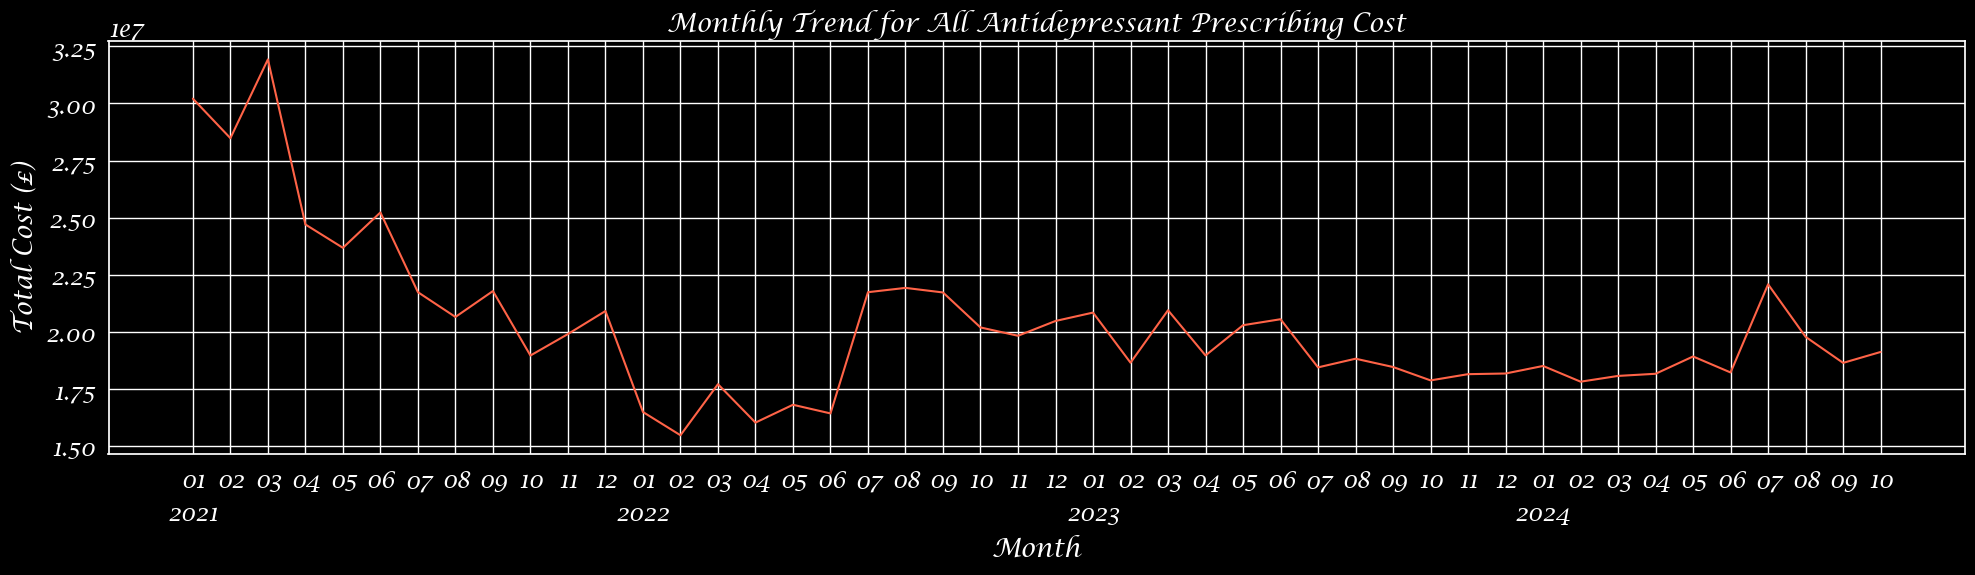

In [24]:
# Group by YEAR_MONTH and sum the prescribing cost
monthly_cost_trend = df.groupby('YEAR_MONTH')['COST'].sum()

# Plot the trend for total antidepressant prescribing cost
plt.figure(figsize=(20, 6))
monthly_cost_trend.plot(kind='line', color='tomato')

# Add title and labels
plt.title('Monthly Trend for All Antidepressant Prescribing Cost')
plt.xlabel('Month')
plt.ylabel('Total Cost (£)')

# Extract months and years from YEAR_MONTH
x_labels = monthly_cost_trend.index  # Get the YEAR_MONTH values
months = [label[4:6] for label in x_labels]  # Extract months (e.g., '01', '02', etc.)
years = [label[:4] for label in x_labels]  # Extract years (e.g., '2021', '2022', etc.)

# Customize x-axis labels
formatted_labels = []
prev_year = None
for month, year in zip(months, years):
    if year != prev_year:  # Add year label only at the start of a new year
        formatted_labels.append(f"{month}\n{year}")  # Add month and year
        prev_year = year
    else:
        formatted_labels.append(month)  # Add only month

# Set the x-axis labels
plt.xticks(ticks=range(len(x_labels)), labels=formatted_labels)

# Show the plot
plt.tight_layout()
plt.show()

##Analysis of the Trends:

1. Monthly Items Trend: The line chart will reveal whether there are any noticeable spikes or drops in prescribing volume over time. This could help identify months where prescriptions increased or decreased significantly, potentially due to seasonal factors or policy changes.

2. Monthly Cost Trend: The cost chart might show that while volumes could remain constant or fluctuate, the cost could still vary depending on the types of drugs being prescribed. For example, if more expensive drugs are prescribed during certain months, it could lead to spikes in costs.

3. By comparing both trends, we can determine if increases in prescribing volume are correlated with higher costs, or if other factors (e.g., the introduction of more expensive drugs) are driving cost increases despite stable or decreasing volumes.


## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus one one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.



##1. Identify Significant Antidepressants (Top 10 by Volume & Cost)
Start by summarizing the total volume and total cost of each antidepressant to find out which ones are most prominent.

In [25]:
# Summarize total volume and cost by drug
summary_table = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE').agg(
    Total_Items=('ITEMS', 'sum'),
    Total_Cost=('COST', 'sum')
).sort_values(by='Total_Items', ascending=False).head(10)

# Display table
summary_table


,Total_Items,Total_Cost
BNF_CHEMICAL_SUBSTANCE,,
Sertraline hydrochloride,85402251,2.056530e+08
Amitriptyline hydrochloride,59272937,9.273951e+07
Citalopram hydrobromide,52891620,7.522518e+07
Mirtazapine,46335570,6.227576e+07
Fluoxetine hydrochloride,28211759,8.143143e+07
Venlafaxine,21447209,1.503813e+08
Duloxetine hydrochloride,14262656,5.487333e+07
Escitalopram,6580386,1.286274e+07
Paroxetine hydrochloride,4886615,1.400101e+07


##2 Percentage of Total Volume or Cost from a Drug
Once you’ve identified a prominent drug, you can calculate its percentage contribution to the total volume and cost.

In [26]:
# Compute total volume and cost
total_volume = pca_regional_drug_summary_df['ITEMS'].sum()
total_cost = pca_regional_drug_summary_df['COST'].sum()

# Compute percentage contribution
summary_table = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE').agg(
    Total_Items=('ITEMS', 'sum'),
    Total_Cost=('COST', 'sum')
).assign(
    Percentage_Volume=lambda x: (x['Total_Items'] / total_volume) * 100,
    Percentage_Cost=lambda x: (x['Total_Cost'] / total_cost) * 100
).sort_values(by='Percentage_Volume', ascending=False).head(10)

# Display table
summary_table


,Total_Items,Total_Cost,Percentage_Volume,Percentage_Cost
BNF_CHEMICAL_SUBSTANCE,,,,
Sertraline hydrochloride,85402251,2.056530e+08,25.640348,22.066947
Amitriptyline hydrochloride,59272937,9.273951e+07,17.795535,9.951122
Citalopram hydrobromide,52891620,7.522518e+07,15.879670,8.071802
Mirtazapine,46335570,6.227576e+07,13.911345,6.682305
Fluoxetine hydrochloride,28211759,8.143143e+07,8.470026,8.737744
Venlafaxine,21447209,1.503813e+08,6.439103,16.136197
Duloxetine hydrochloride,14262656,5.487333e+07,4.282082,5.888010
Escitalopram,6580386,1.286274e+07,1.975632,1.380196
Paroxetine hydrochloride,4886615,1.400101e+07,1.467110,1.502335


##3 Mean Cost per Item for a Drug
Next, calculate the mean cost per item for each antidepressant and compare them.

In [27]:
# Compute mean cost per item
summary_table = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE').apply(
    lambda x: (x['COST'] / x['ITEMS']).mean(skipna=True)
).reset_index(name='Mean_Cost_Per_Item').sort_values(by='Mean_Cost_Per_Item', ascending=False).head(10)

# Display table
summary_table


,BNF_CHEMICAL_SUBSTANCE,Mean_Cost_Per_Item
26,Tranylcypromine sulfate,1372.850734
19,Nefazodone hydrochloride,587.784688
14,Isocarboxazid,428.977524
28,Trimipramine maleate,375.701522
23,Phenelzine sulfate,305.615095
7,Doxepin,202.427738
2,Amoxapine,183.680000
29,Tryptophan,134.897271
16,Mianserin hydrochloride,63.720240
21,Oxitriptan,51.282681


##4 Distribution of Mean Cost Per Item
You can visualize the distribution of mean cost per item for a selected drug.

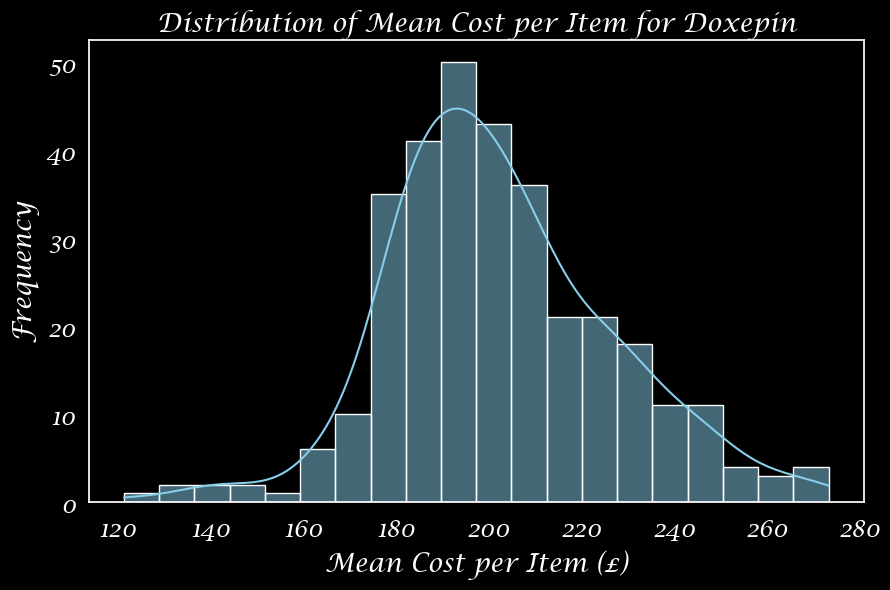

In [28]:
selected_drug = 'Doxepin'
drug_data = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == selected_drug].copy()
drug_data['Mean_Cost_Per_Item'] = drug_data['COST'] / drug_data['ITEMS']

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(drug_data['Mean_Cost_Per_Item'].dropna(), bins=20, kde=True, color='skyblue')
plt.title(f'Distribution of Mean Cost per Item for {selected_drug}')
plt.xlabel('Mean Cost per Item (£)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


##5. Trend Analysis Over Time for Significant Drug
You can also look at the trend for the selected drug over time.

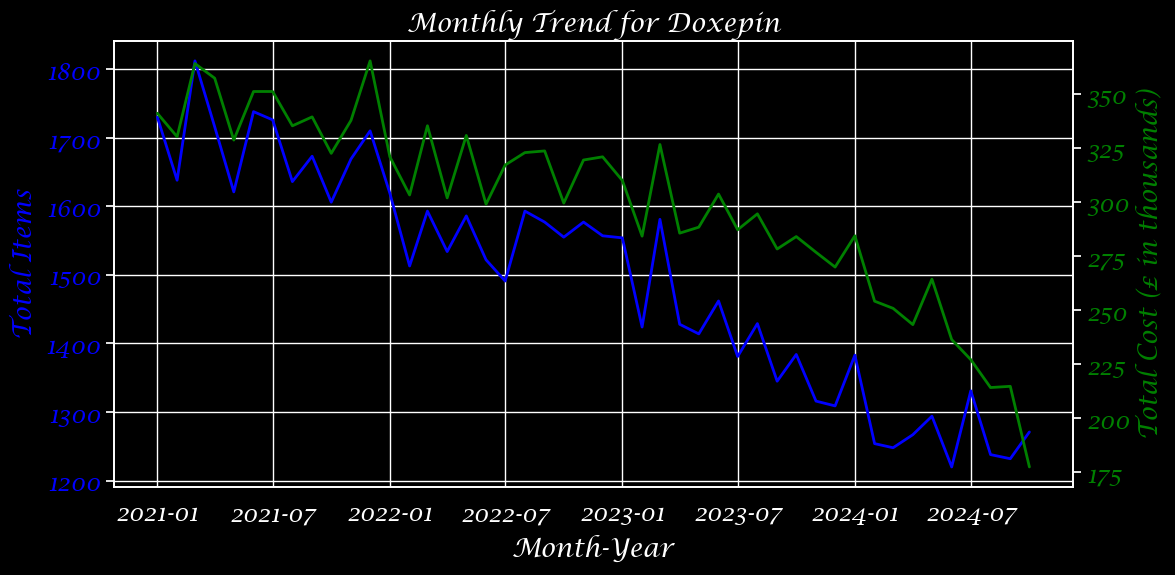

In [29]:
# Convert 'YEAR_MONTH' column to datetime format
pca_regional_drug_summary_df['Month_Year'] = pd.to_datetime(
    pca_regional_drug_summary_df['YEAR_MONTH'].astype(str), format='%Y%m'
)

# Select a drug (e.g., 'Doxepin')
selected_drug = 'Doxepin'
trend_data = pca_regional_drug_summary_df[
    pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == selected_drug
].groupby('Month_Year').agg(
    Total_Items=('ITEMS', 'sum'),
    Total_Cost=('COST', 'sum')
).reset_index()

# Scale total cost (divide by 1000) to match the scale of total items
trend_data['Total_Cost_Thousand'] = trend_data['Total_Cost'] / 1000

# Plot trends with dual axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Items on primary y-axis
ax1.set_xlabel("Month-Year")
ax1.set_ylabel("Total Items", color="blue")
ax1.plot(trend_data["Month_Year"], trend_data["Total_Items"], label="Total Items", color="blue", linewidth=2)
ax1.tick_params(axis="y", labelcolor="blue")

# Create secondary y-axis for Total Cost
ax2 = ax1.twinx()
ax2.set_ylabel("Total Cost (£ in thousands)", color="green")
ax2.plot(trend_data["Month_Year"], trend_data["Total_Cost_Thousand"], label="Total Cost (£ in thousands)", color="green", linewidth=2)
ax2.tick_params(axis="y", labelcolor="green")

# Title and formatting
plt.title(f"Monthly Trend for {selected_drug}")
fig.tight_layout()
plt.grid()
plt.show()


## Summary of Findings

- Prescription volumes and costs have generally increased over the analyzed period.
- The **Midlands** region shows the highest prescription volume, while the **Southeast** has the highest cost.
- The most prescribed drug is **Sertraline Hydrochloride**, but it is not the most expensive per item.
- Cost variations are influenced by drug pricing, regional policies, and prescribing habits.
- Further analysis could explore socioeconomic factors affecting prescribing trends.

# Conclusion

This report analyzed antidepressant prescribing trends in England using NHS data. The findings highlight significant regional differences, cost variations, and increasing prescription volumes. Future studies could explore additional factors driving these trends.
